In [1]:
# -*- coding: utf-8 -*

import numpy as np  # for matrix calculation
import matplotlib.pyplot as plt 


In [2]:
# load the CSV file as a numpy matrix
data_file = open('watermelon_3a.csv')
dataset = np.loadtxt(data_file, delimiter=",")

In [3]:
# separate the data from the target attributes
X = dataset[:,1:3]
y = dataset[:,3]

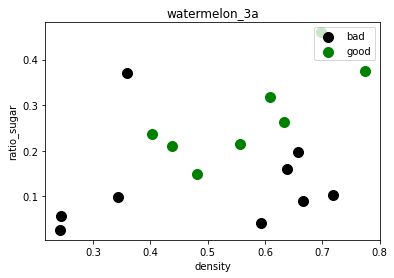

In [4]:
# draw scatter diagram to show the raw data
f1 = plt.figure(1)       
plt.title('watermelon_3a')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.scatter(X[y == 0,0], X[y == 0,1], marker = 'o', color = 'k', s=100, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=100, label = 'good')
plt.legend(loc = 'upper right')  
plt.show()

In [5]:
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# generalization of train and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=0)

In [7]:
# model fitting
lda_model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X_train, y_train)

In [8]:
# model validation
y_pred = lda_model.predict(X_test)

In [9]:
# summarize the fit of the model
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[4 1]
 [1 3]]
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80         5
         1.0       0.75      0.75      0.75         4

    accuracy                           0.78         9
   macro avg       0.78      0.78      0.78         9
weighted avg       0.78      0.78      0.78         9



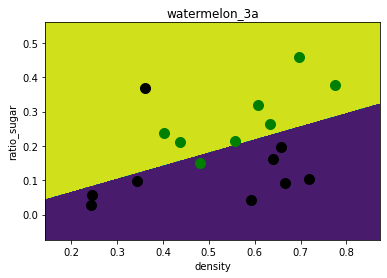

In [10]:
# draw the classfier decision boundary
f2 = plt.figure(2) 
h = 0.001
x0_min, x0_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
x1_min, x1_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1


x0, x1 = np.meshgrid(np.arange(x0_min, x0_max, h),
                     np.arange(x1_min, x1_max, h))

z = lda_model.predict(np.c_[x0.ravel(), x1.ravel()]) 
# Put the result into a color plot
z = z.reshape(x0.shape)
plt.contourf(x0, x1, z)

# Plot also the training pointsplt.title('watermelon_3a')  
plt.title('watermelon_3a')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.scatter(X[y == 0,0], X[y == 0,1], marker = 'o', color = 'k', s=100, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=100, label = 'good')
plt.show()

<i class="fa fa-question-circle" aria-hidden="true"> 问题9：</i> 使用带正则项的逻辑回归来完成对瓜的分类，并优化正则化参数。

In [11]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体（解决中文无法显示的问题）
matplotlib.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号“-”显示方块的问题

In [12]:
from sklearn.linear_model import LogisticRegression as lr

In [13]:
def plot_boundary(clf, X, y, grid_step=.01):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))

    # 在 [x_min, m_max]x[y_min, y_max] 的每一点都用它自己的颜色来对应
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

In [14]:
C = 1e-2
logistic = lr(penalty='l2',C=C)
logistic.fit(X_train,y_train)

LogisticRegression(C=0.01)

In [15]:
y_pre = logistic.predict(X_test)
print(metrics.classification_report(y_test, y_pre))

              precision    recall  f1-score   support

         0.0       1.00      0.40      0.57         5
         1.0       0.57      1.00      0.73         4

    accuracy                           0.67         9
   macro avg       0.79      0.70      0.65         9
weighted avg       0.81      0.67      0.64         9



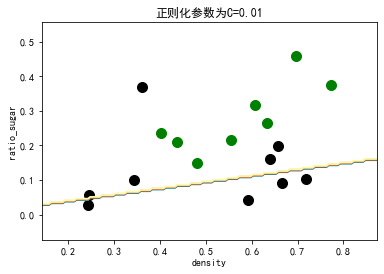

In [16]:
plot_boundary(logistic, X, y, grid_step=.005)

plt.title('watermelon_3a')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.title('正则化参数为C=%s' % C)
plt.scatter(X[y == 0,0], X[y == 0,1], marker = 'o', color = 'k', s=100, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=100, label = 'good')
plt.show()

In [17]:
C = 1
logistic = lr(penalty='l2',C=C)
logistic.fit(X_train,y_train)

LogisticRegression(C=1)

In [18]:
y_pre = logistic.predict(X_test)
print(metrics.classification_report(y_test, y_pre))

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80         5
         1.0       0.75      0.75      0.75         4

    accuracy                           0.78         9
   macro avg       0.78      0.78      0.78         9
weighted avg       0.78      0.78      0.78         9



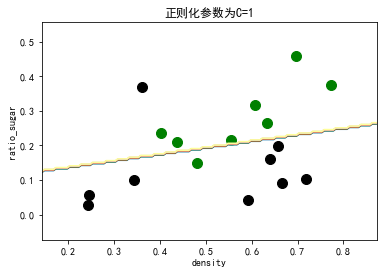

In [19]:
plot_boundary(logistic, X, y, grid_step=.005)

plt.title('watermelon_3a')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.title('正则化参数为C=%s' % C)
plt.scatter(X[y == 0,0], X[y == 0,1], marker = 'o', color = 'k', s=100, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=100, label = 'good')
plt.show()

<i class="fa fa-question-circle" aria-hidden="true"> 问题10：</i> 不调用 LinearDiscriminantAnalysis而是通过散度的计算来完成本题目，简单说就是不直接调库，但可以调用数学函数比如np.mean和np.dot等。

In [25]:
class LDA(object):
 
    def fit(self, X_, y_, plot_=False):
        pos = y_ == 1
        neg = y_ == 0
        X0 = X_[neg]
        X1 = X_[pos]
 
        u0 = X0.mean(0, keepdims=True)  # (1, n)
        u1 = X1.mean(0, keepdims=True)
 
        sw = np.dot((X0 - u0).T, X0 - u0) + np.dot((X1 - u1).T, X1 - u1)
        w = np.dot(np.linalg.inv(sw), (u0 - u1).T).reshape(1, -1)  # (1, n)
 
        self.w = w
        self.u0 = u0
        self.u1 = u1
        return self
  
    def predict(self, X):
        project = np.dot(X, self.w.T)
 
 
        wu0 = np.dot(self.w, self.u0.T)
        wu1 = np.dot(self.w, self.u1.T)
 
 
        return (np.abs(project - wu1) < np.abs(project - wu0)).astype(int)


In [26]:
lda_mine_model = LDA()
lda_mine_model.fit(X_train, y_train)

In [27]:
y_pre = lda_mine_model.predict(X_test)

In [28]:
print(metrics.confusion_matrix(y_test, y_pre))
print(metrics.classification_report(y_test, y_pre))

[[4 1]
 [1 3]]
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80         5
         1.0       0.75      0.75      0.75         4

    accuracy                           0.78         9
   macro avg       0.78      0.78      0.78         9
weighted avg       0.78      0.78      0.78         9



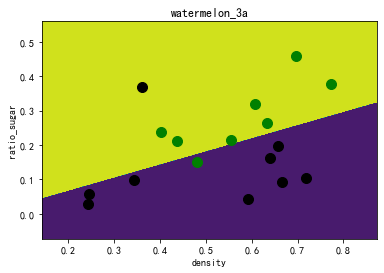

In [29]:
h = 0.001
x0_min, x0_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
x1_min, x1_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1


x0, x1 = np.meshgrid(np.arange(x0_min, x0_max, h),
                     np.arange(x1_min, x1_max, h))

z = lda_mine_model.predict(np.c_[x0.ravel(), x1.ravel()]) 
# Put the result into a color plot
z = z.reshape(x0.shape)
plt.contourf(x0, x1, z)

# Plot also the training pointsplt.title('watermelon_3a')  
plt.title('watermelon_3a')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.scatter(X[y == 0,0], X[y == 0,1], marker = 'o', color = 'k', s=100, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=100, label = 'good')
plt.show()